<a href="https://colab.research.google.com/github/Mario-RJunior/Departamento-vendas-forecasting/blob/main/forecasting_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Departamento de vendas

## Importação das bibliotecas e base de dados

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Dados das vendas

In [2]:
# Carregando a base de dados
sales_train_df = pd.read_csv('/content/train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Visualizando shape
l, c = sales_train_df.shape
print('Número de registros: {} \nNúmeros de coluna: {}'.format(l, c))

Número de registros: 1017209 
Números de coluna: 9


In [4]:
# Visualizando o cabeçalho
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Visualizando os últimos registros
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
# Visualizando valores únicos das vendas
day = sales_train_df['DayOfWeek'].unique()
open = sales_train_df['Open'].unique()
promo = sales_train_df['Promo'].unique()
state_holiday = sales_train_df['StateHoliday'].unique()
school_holiday = sales_train_df['SchoolHoliday'].unique()

print('Dias da semana: {} \nAberta ou fechada: {} \nPromoção: {} \nFeriado: {} \nFeriado escolar: {}'\
      .format(day, open, promo, state_holiday, school_holiday))

Dias da semana: [5 4 3 2 1 7 6] 
Aberta ou fechada: [1 0] 
Promoção: [1 0] 
Feriado: ['0' 'a' 'b' 'c' 0] 
Feriado escolar: [1 0]


In [7]:
# Informações
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
# Visualizando estatísticas
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Dados das lojas

In [9]:
# Carregando a base de dados
stores_info_df = pd.read_csv('/content/store.csv')

In [10]:
# Visualizando shape
l, c = pd.read_csv('/content/store.csv').shape
print('Número de registros: {} \nNúmeros de coluna: {}'.format(l, c))

Número de registros: 1115 
Números de coluna: 10


In [11]:
# Visualizando o cabeçalho
stores_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
# Informações
stores_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [13]:
# Visualizando estatísticas
stores_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Exploração dos dados

### Dados das vendas

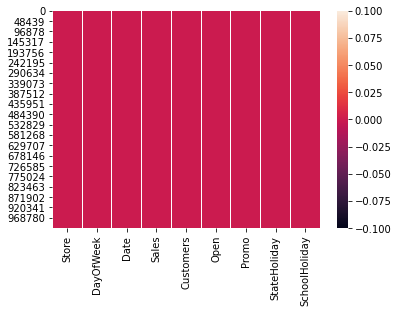

In [14]:
# Verificando existência de valores faltantes
sns.heatmap(data=sales_train_df.isnull());

In [15]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Logo, não há valores nulos.

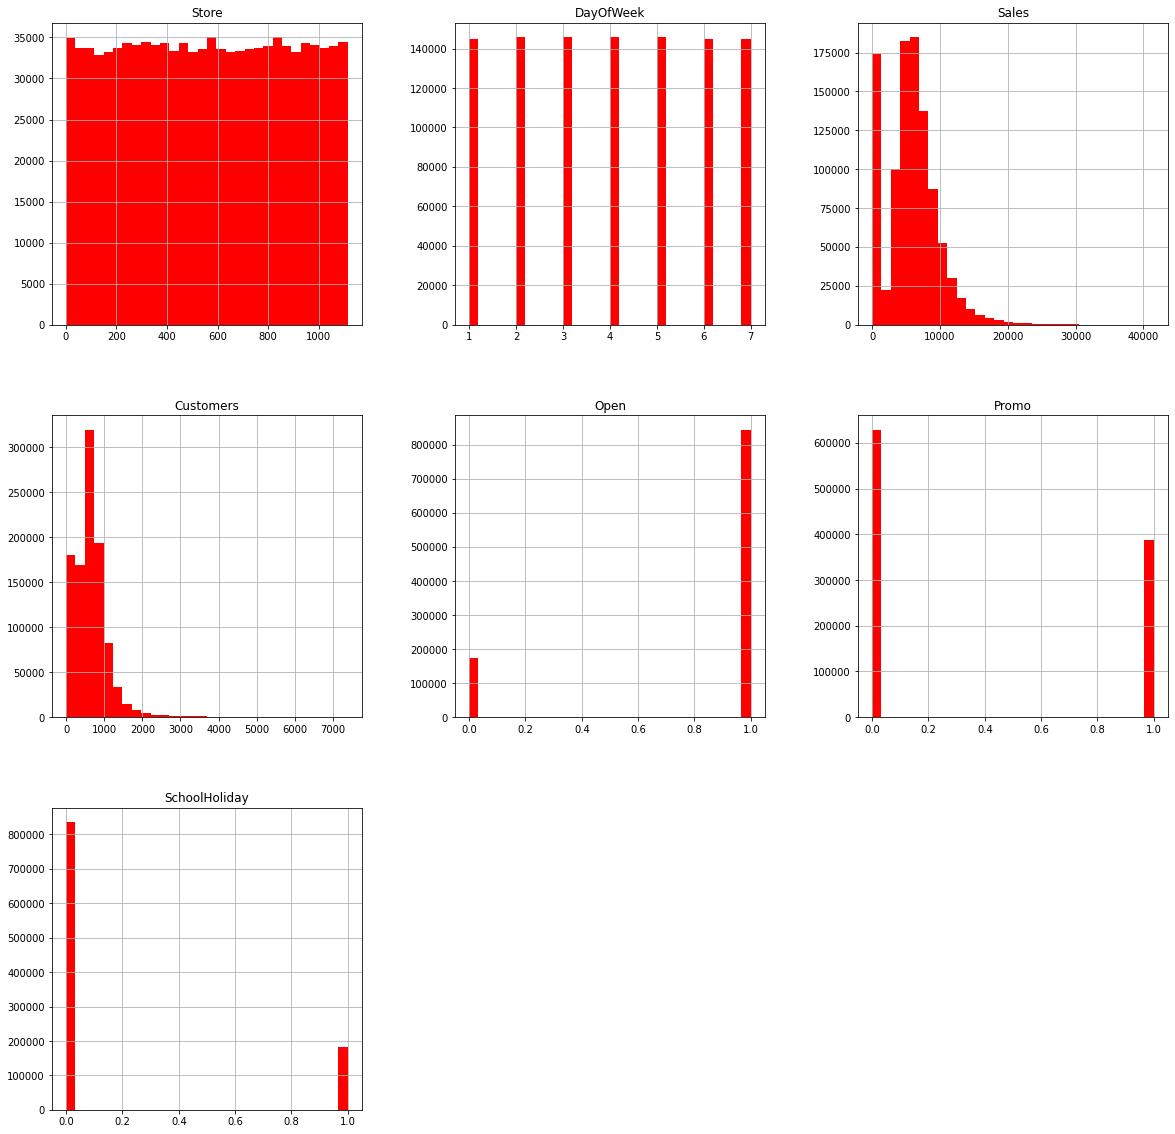

In [16]:
# Histograma
sales_train_df.hist(bins=30, figsize=(20,20), color='r');

In [17]:
# Verificando valor máximo de pessoas em um dia
sales_train_df['Customers'].max()

7388

Para uma melhor análise, iremos gerar dois dataframes: para quando as lojas estão abertas e para quando as lojas estão fechadas. 

In [18]:
# Lojas fechadas
closed_train_df = sales_train_df.query('Open == 0')

# Lojas abertas
open_train_df = sales_train_df.query('Open == 1')

In [19]:
print('Total: {} \nNúmero de lojas/dias fechados {} \nNúmero de lojas/dias abertos: {} '\
      .format(len(sales_train_df), len(closed_train_df), len(open_train_df)))

Total: 1017209 
Número de lojas/dias fechados 172817 
Número de lojas/dias abertos: 844392 


In [20]:
# Visualizando dataframe das lojas fechadas
closed_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


In [21]:
# Visualizando dataframe das lojas abertas
open_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Note que temos os números de dias das lojas abertas ou fechadas para todas as 17 lojas. Para visualizarmos o este número para cada loja separadamente temos:

In [22]:
# Número de dias com as lojas fechadas
len(closed_train_df) / len(stores_info_df)

154.99282511210762

Desta forma, recriaremos o dataframe considerando apenas os dias em que as lojas estavam abertas.

In [23]:
# Redefinindo o dataframe
sales_train_df = sales_train_df.query('Open == 1')

In [24]:
# Visualizando seu novo shape
sales_train_df.shape

(844392, 9)

In [25]:
# Visualizando novamente
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


Neste caso não faz mais sentido mantermos a coluna "Open". Podemos então, excluí-la do dataframe.

In [26]:
# Excluindo a coluna "Open"
sales_train_df.drop(columns='Open', axis=1, inplace=True)

In [27]:
# Checando o dataframe
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [28]:
# Visualizando novamente as estatísticas
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


### Dados das lojas

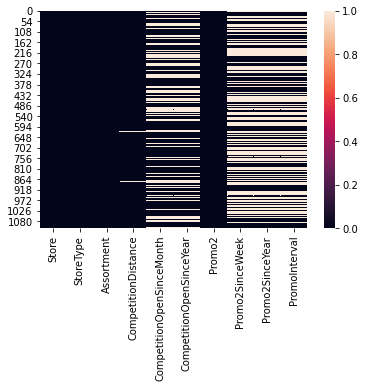

In [29]:
# Visualizando valores faltantes com heatmap
sns.heatmap(data=stores_info_df.isnull());

In [30]:
stores_info_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Vemos então que há muitos dados faltantes neste dataframe. Assim, daremos inicio ao tratamento destes valores, mas antes iremos visualizar estes valores.

In [31]:
stores_info_df[stores_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [32]:
stores_info_df[stores_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [33]:
stores_info_df[stores_info_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [34]:
stores_info_df[stores_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


Inicialmente iremos tratar os dados das colunas 'Promo2SinceWeek'	'Promo2SinceYear', 'PromoInterval', CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth'

In [35]:
# Tratamento das colunas 
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

for str in str_cols:
  stores_info_df[str].fillna(0, inplace=True)

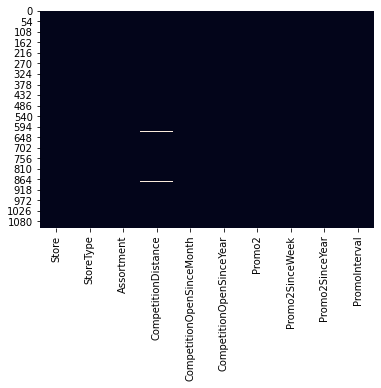

In [36]:
# Visualizando com o heatmap
sns.heatmap(data=stores_info_df.isnull(), cbar=False)

Tratando agora as colunas 'CompetitionDistance'.

In [37]:
# Tratando a coluna 'CompetitionDistance'
stores_info_df['CompetitionDistance'].fillna(stores_info_df['CompetitionDistance'].mean(), inplace=True)

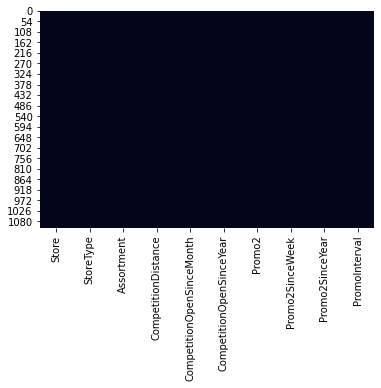

In [39]:
# Visualizando com o heatmap
sns.heatmap(data=stores_info_df.isnull(), cbar=False)

Vamos ainda plotar gráficos de distribuição para cada atributo.

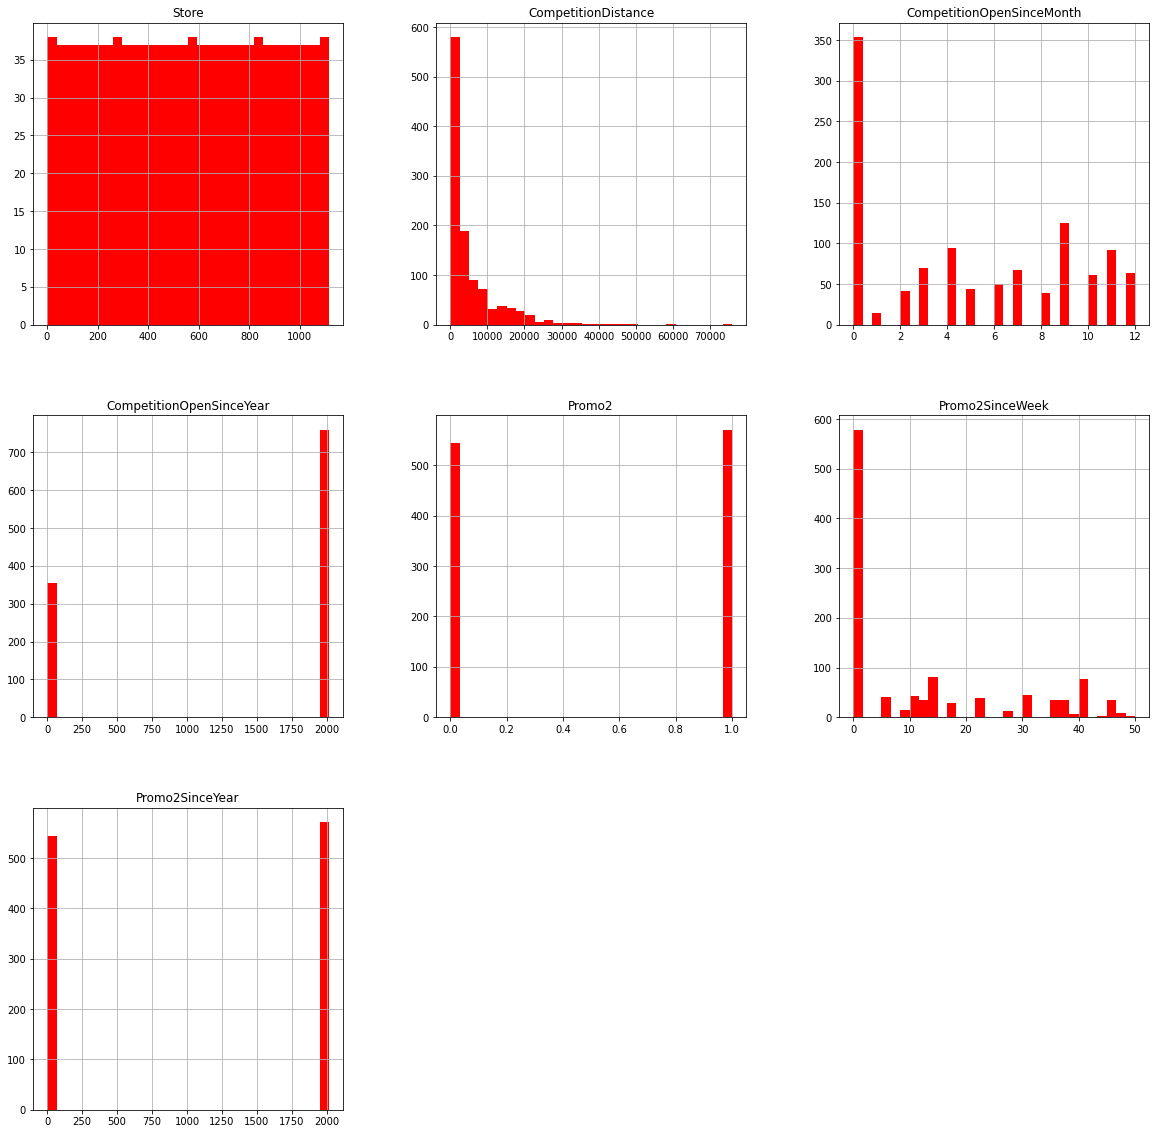

In [40]:
# Histograma
stores_info_df.hist(bins=30, figsize=(20,20), color='r');

### Dados Unidos (vendas + lojas)

In [41]:
# Visualizando cabeçalho das vendas
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [42]:
# Visualizando cabeçalho das lojas
stores_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


Note que ambas as tabelas existem a coluna "Store", que funcina como uma chave primária. Desta forma, usaremos esta coluna para fazer uma junção das duas.

In [43]:
# Unindo as tabelas
sales_train_all_df = pd.merge(left=sales_train_df, 
                              right=stores_info_df, 
                              how='inner', on='Store')

In [44]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [45]:
sales_train_all_df.shape

(844392, 17)

Gerando a matriz de correlação entre as variáveis.

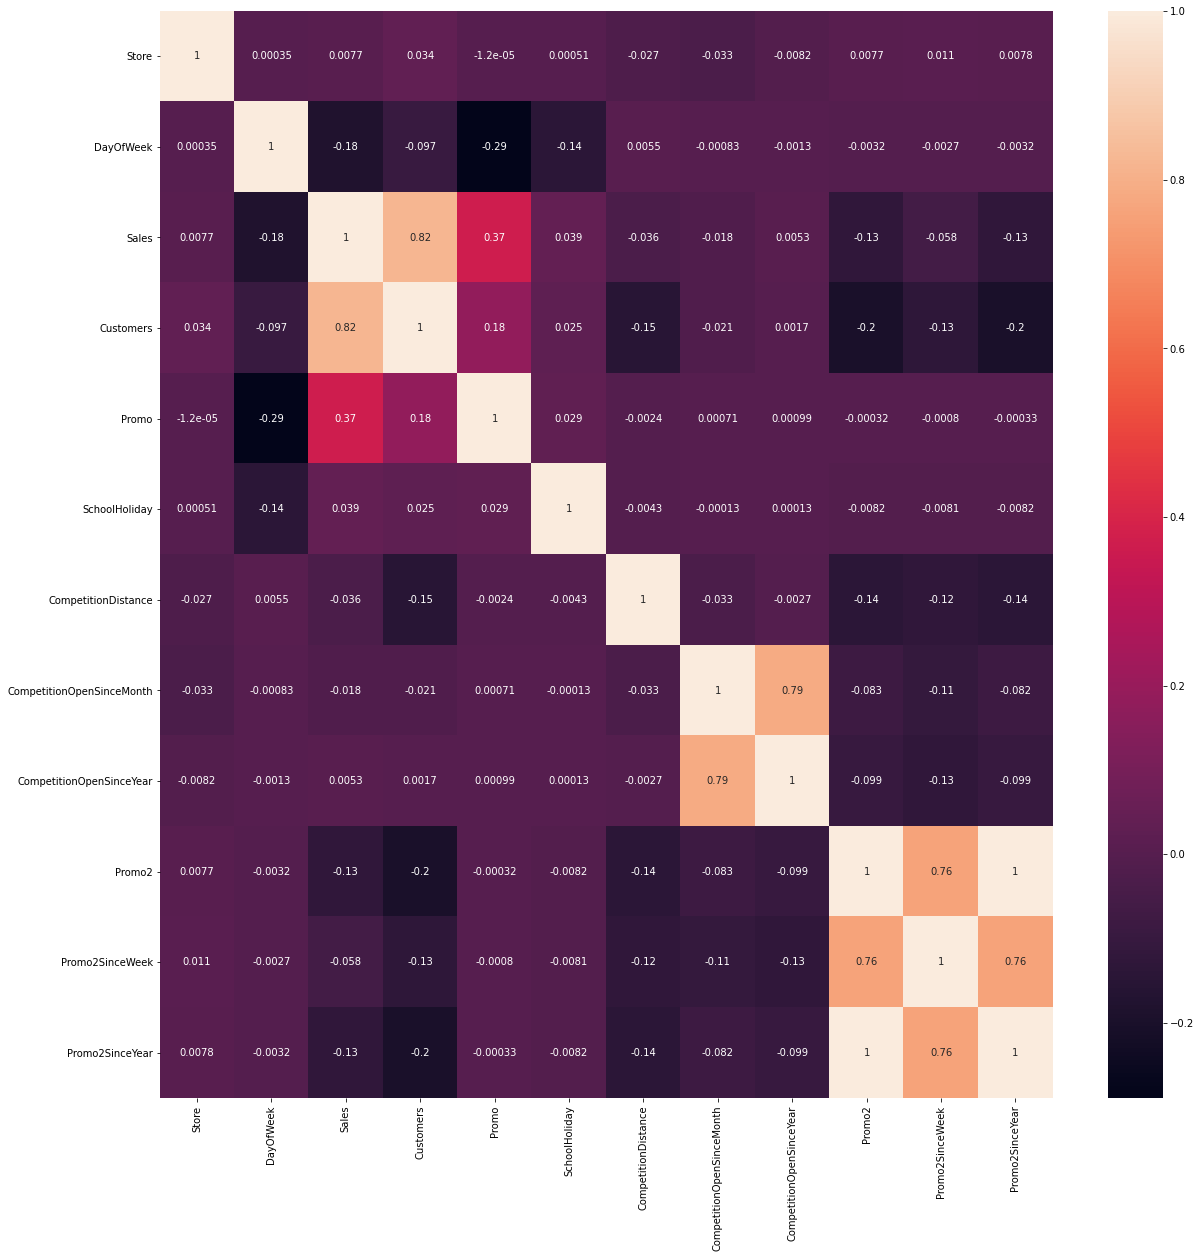

In [47]:
correlations = sales_train_all_df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=correlations, annot=True)

Verificando a correlação dos atributos apenas com a variável "Sales".

In [48]:
correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

Vemos que temos uma forte correlação de  "Sales" com "Customers" que de fato era esperada, uma vez que quanto mais clientes mais vendas ocorrem. Vemos ainda que há um correlação de fraca para moderada com a variável promo, ou seja, quando fazemos promoções aumentamos ligeiramente as vendas.

Agora, iremos fazer alguns gráficos levando em consideração a variável "Date".

In [49]:
# Criando 3 atributos para dia, mês e ano
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [50]:
# Visualizando a nova tabela
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


Text(0.5, 1.0, 'Média de vendas por mês')

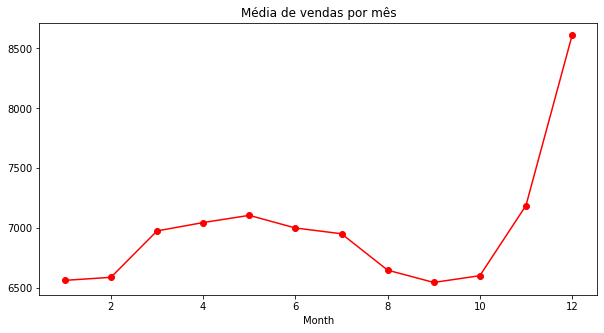

In [54]:
# Média das vendas por mês
axis = sales_train_all_df.groupby(by='Month')['Sales'].mean().plot(figsize=(10,5), marker='o', color='r')
axis.set_title('Média de vendas por mês')

Text(0.5, 1.0, 'Média de clientes por mês')

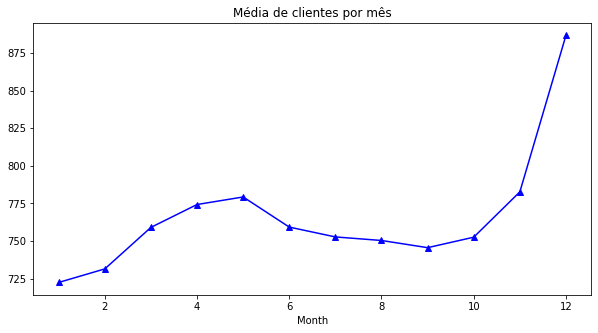

In [55]:
# Média da quantidade de clientes que frequentam a loja por mês
axis = sales_train_all_df.groupby(by='Month')['Customers'].mean().plot(figsize=(10,5), marker='^', color='b')
axis.set_title('Média de clientes por mês')

Text(0.5, 1.0, 'Média de vendas por dia')

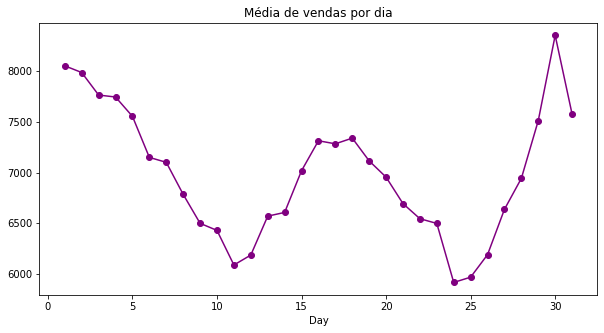

In [58]:
# Média das vendas por dia
axis = sales_train_all_df.groupby(by='Day')['Sales'].mean().plot(figsize=(10,5), marker='o', color='purple')
axis.set_title('Média de vendas por dia')

Text(0.5, 1.0, 'Média de clientes por mês')

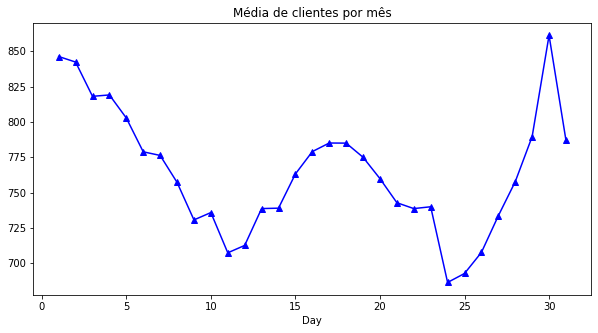

In [60]:
# Média das vendas por mês
axis = sales_train_all_df.groupby(by='Day')['Customers'].mean().plot(figsize=(10,5), marker='^', color='b')
axis.set_title('Média de clientes por mês')

Text(0.5, 1.0, 'Média de vendas por dia da semana')

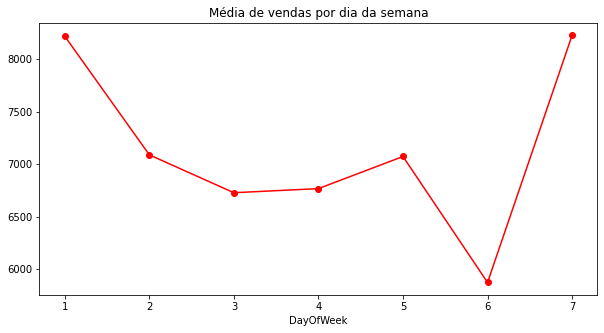

In [61]:
# Média das vendas por dia da semana
axis = sales_train_all_df.groupby(by='DayOfWeek')['Sales'].mean().plot(figsize=(10,5), marker='o', color='r')
axis.set_title('Média de vendas por dia da semana')

Text(0.5, 1.0, 'Média de clientes por dia da semana')

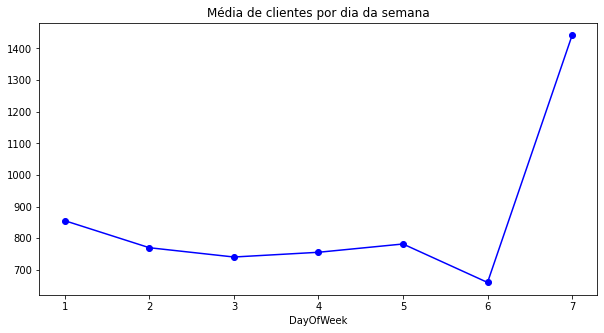

In [63]:
# Média de clientes por dia da semana
axis = sales_train_all_df.groupby(by='DayOfWeek')['Customers'].mean().plot(figsize=(10,5), marker='o', color='b')
axis.set_title('Média de clientes por dia da semana')

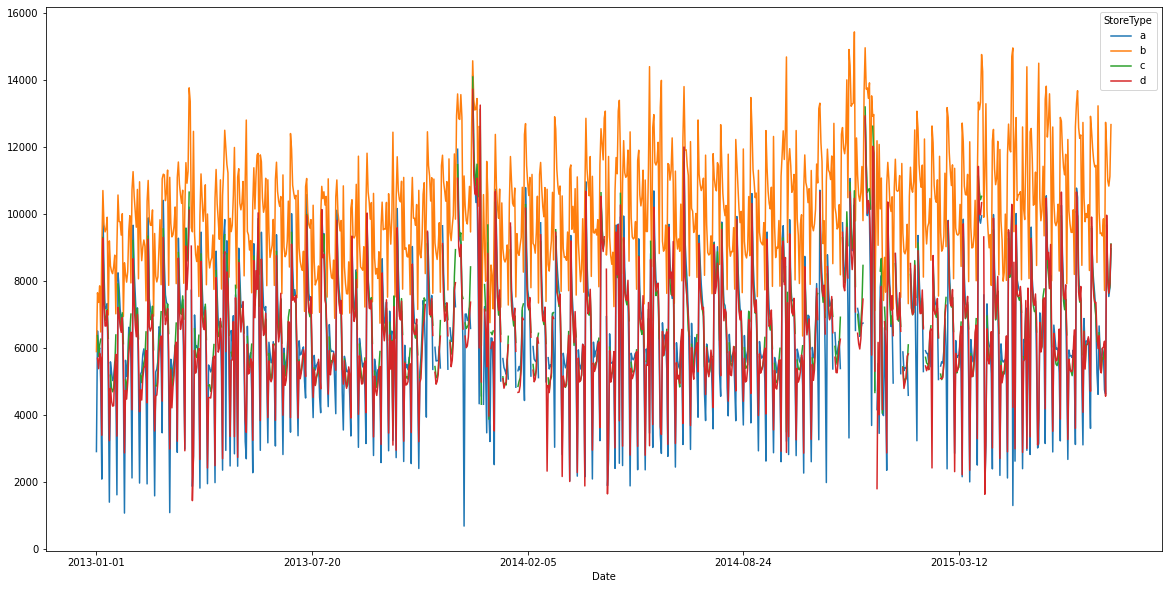

In [66]:
# Vendas por tipo de loja
fig, ax = plt.subplots(figsize=(20,10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax=ax)

Vemos que a loja do tipo "b" tem a maior média de vendas, podendo ser considerada de maior porte em relação às outras. Enquanto isso, a loja do tipo "a" aparentemente é a menor delas uma vez que teve menor média de vendas.

Vamos ver agora se a promoção afeta as vendas e o número de clientes.

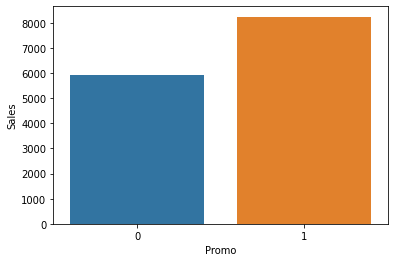

In [67]:
# Número de vendas e promoção
sns.barplot(x='Promo', y='Sales', data=sales_train_all_df);

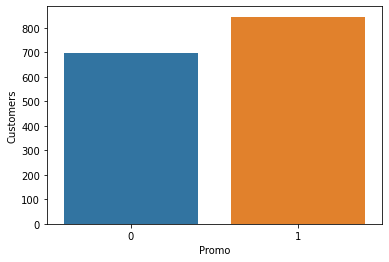

In [68]:
# Número de clientes e promoção
sns.barplot(x='Promo', y='Customers', data=sales_train_all_df);

Note que quando há promoção as vendas aumentam em mais de 2000 euros e o número de clientes aumenta em mais de 100.

## Treinamento do modelo

Criaremos agora um modelo de previsões para as lojas utilizando séries temporais e para isso, iremos usar a biblioteca **fbprophet**.

In [69]:
# Importando a biblioteca
from fbprophet import Prophet

In [76]:
# Criando uma função para fazer as previsões
# Renomenado as colunas: Date -> ds e Sales -> y
def sales_prediction(store_id, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by='ds')

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel='Data', ylabel='Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

In [75]:
#df = sales_prediction(10, sales_train_all_df, 10)
#df

,ds,y
7819,2013-01-02,4812
7818,2013-01-03,4675
7817,2013-01-04,5114
7816,2013-01-05,4256
7815,2013-01-07,7804
...,...,...
7040,2015-07-27,7212
7039,2015-07-28,6140
7038,2015-07-29,5524
7037,2015-07-30,6186


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


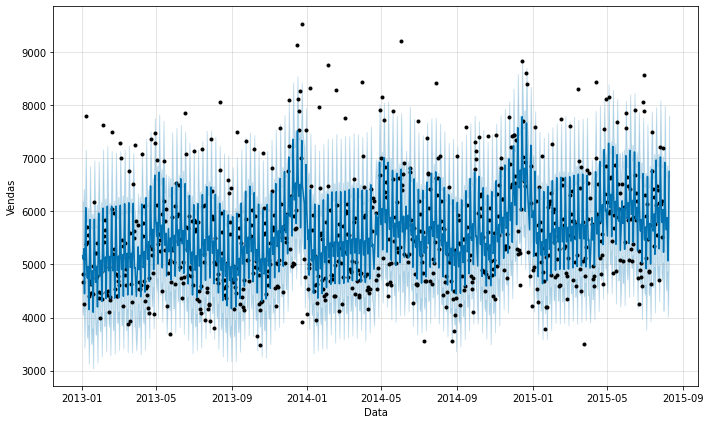

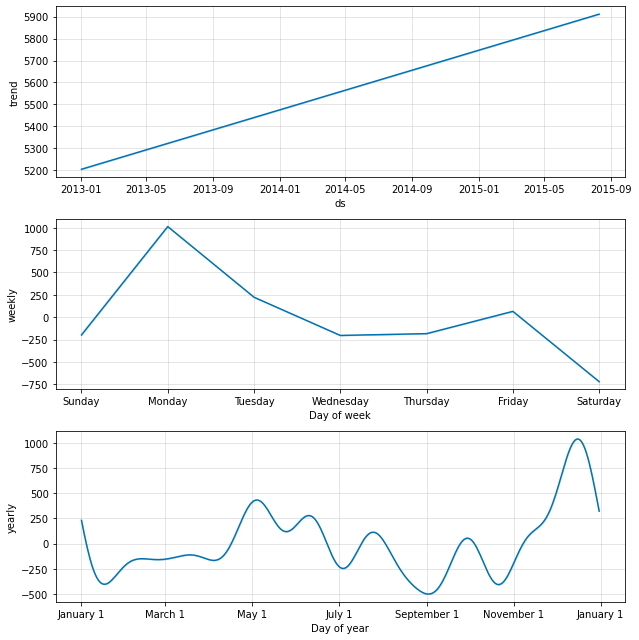

In [77]:
df_origin, df_prediction = sales_prediction(10, sales_train_all_df, 10)

In [78]:
df_origin.shape, df_prediction.shape

((784, 2), (794, 19))